In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras import optimizers
import os
from google.colab import drive
import h5py
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix

### Read The data

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

### Train Test Split

In [37]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [38]:
print("Shape of the train set",X_train.shape)
print("Shape of the labels in train set ",y_train.shape)
print("Shape of the test set",X_test.shape)
print("Shape of the labels in test set",y_test.shape)

Shape of the train set (42000, 32, 32)
Shape of the labels in train set  (42000,)
Shape of the test set (18000, 32, 32)
Shape of the labels in test set (18000,)


- so we have 42000 images each of 32x32 pixels in training set and 18000 images each of 32x32 pixels in testing set

In [39]:
lab = pd.Series(y_train)
lab.value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
dtype: int64

In [40]:
lab1 = pd.Series(y_test)
lab1.value_counts()

6    1832
1    1828
0    1814
8    1812
4    1812
7    1808
9    1804
2    1803
5    1768
3    1719
dtype: int64

- we have target values in both train and test set almost equally distributed for every target values

#### Lets Visualise some of the labels and their images

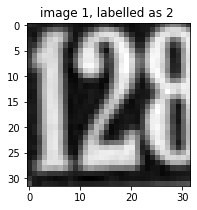

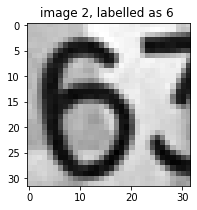

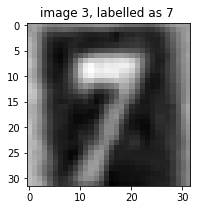

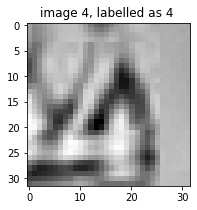

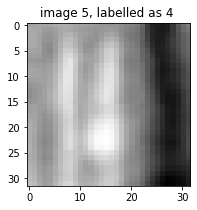

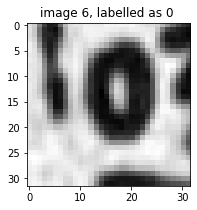

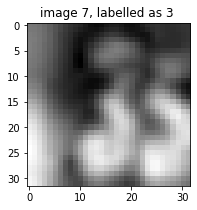

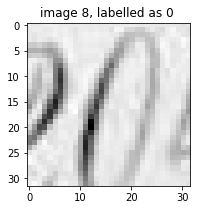

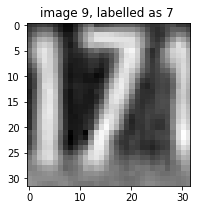

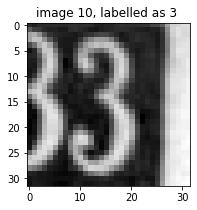

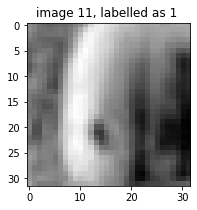

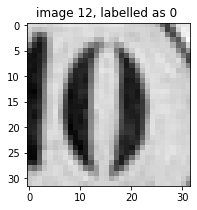

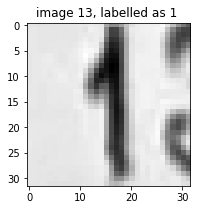

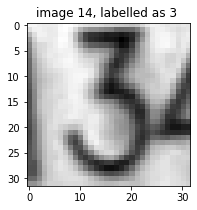

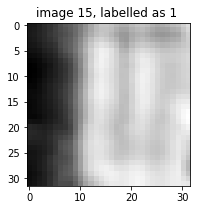

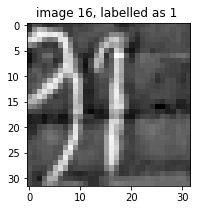

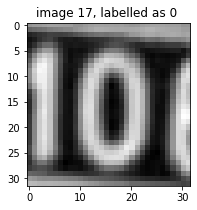

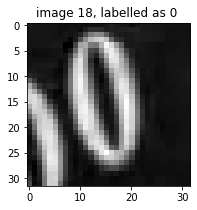

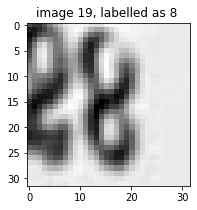

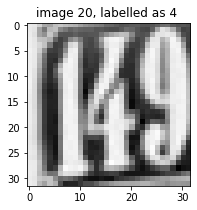

In [41]:
for i in range(20):
    image = X_train[i]
    plt.figure(i,figsize=(7,3))
    plt.title("image {0}, labelled as {1} ".format(i+1,y_train[i])) 
    plt.imshow(image,cmap='gray')

### Reshaping and Normalizing the data


In [42]:
X_train = X_train.reshape(42000, 1024)
X_test = X_test.reshape(18000, 1024)

In [43]:
print("Shape of the train set after reshaping",X_train.shape)
print("Shape of the test set after reshaping",X_test.shape)

Shape of the train set after reshaping (42000, 1024)
Shape of the test set after reshaping (18000, 1024)


- lets view the data since they have been reshaped

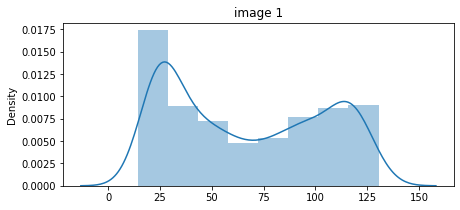

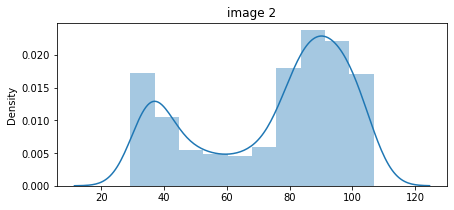

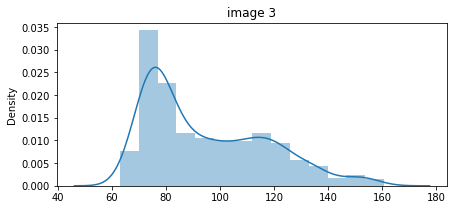

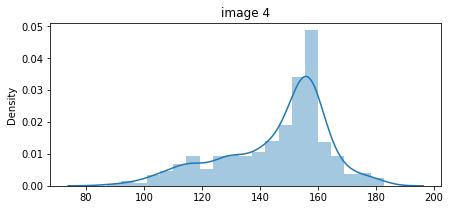

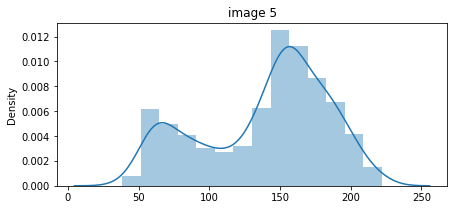

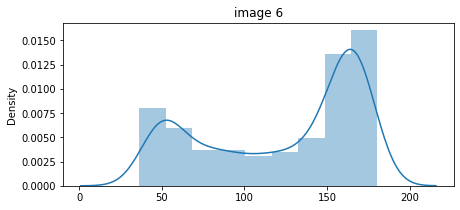

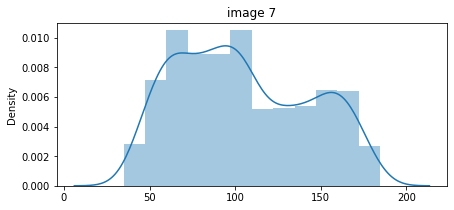

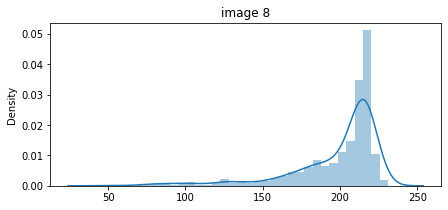

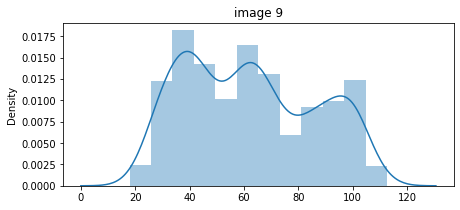

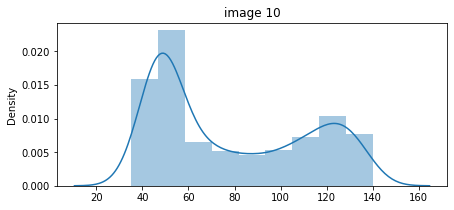

In [44]:
for i in range(10):
  plt.figure(i,figsize=(7,3))
  plt.title("image {}".format(i+1))
  plot = sns.distplot(X_train[i])

- we can notice from the above graphs that the images are not normalised and they have to be normalised

In [45]:
X_train = X_train / 255.0
X_test = X_test / 255.0

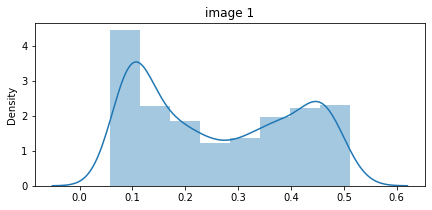

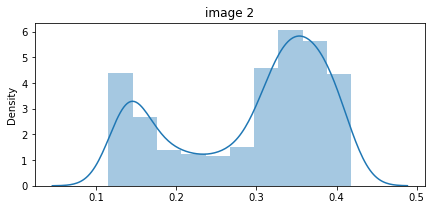

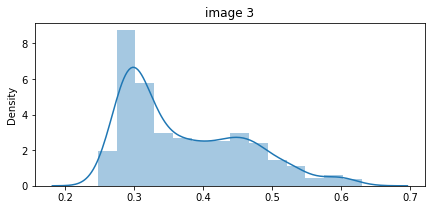

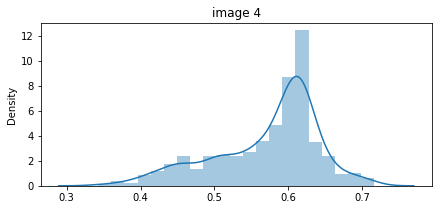

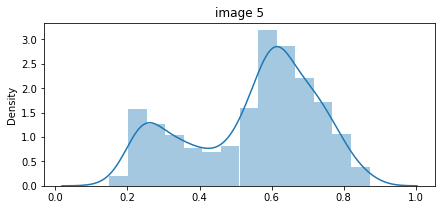

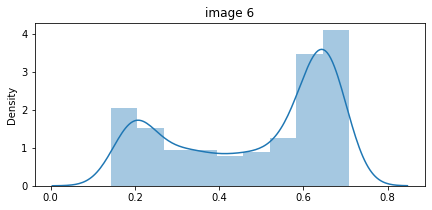

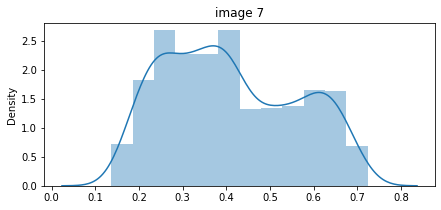

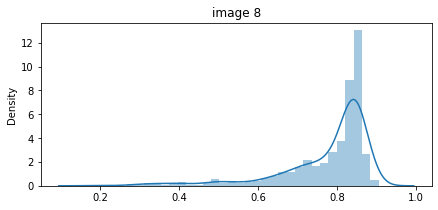

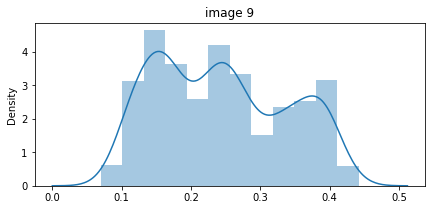

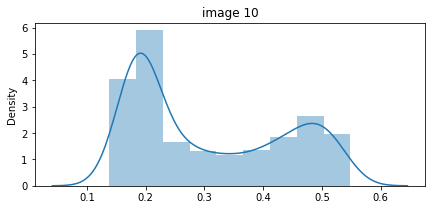

In [46]:
for i in range(10):
  plt.figure(i,figsize=(7,3))
  plt.title("image {}".format(i+1))
  plot = sns.distplot(X_train[i])

- WE have normalised the data now

### One hot Encoding

In [47]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [48]:
print("Shape of the train set labels after one hot encoding ",y_train.shape)
print("Shape of the test set labels after one hot encoding ",y_test.shape)

Shape of the train set labels after one hot encoding  (42000, 10)
Shape of the test set labels after one hot encoding  (18000, 10)


- one hot encoding is done on the target values in both train and test sets 
- we can notice that the target value has 10 new columns

### Defining Model Architechture

In [49]:
model = Sequential()

# layer 1 Batch normalization
model.add(BatchNormalization(input_shape = (1024,)))

# layer 2 flatten layer
model.add(Flatten())

# layer 3 dense layer
model.add(Dense(1000, activation='relu'))

#layer 4 dense layer
model.add(Dense(500, activation='relu'))

#layer 5 dense layer
model.add(Dense(200, activation='relu'))

#layer 6 dense layer
model.add(Dense(100, activation='relu'))

# layer 7 dense layer
model.add(Dense(10, activation='softmax'))

- we have batch normalization which takes an input vector of size 1024 and gives an output vector of size 1024 after normalizing.
- added a flatten layer 
- we have 4 dense layers with relu activation function which has 1000, 500, 200, 100 neurons respectively. 
- finally we have a dense layer with softmax activation
- the output dense layer has 10 units because we have 0 target values.

### Model Summary

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_6 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

### Compiling The model

In [55]:
# entering learning rate
adm_lr = optimizers.Adam(lr = 0.0001)

In [56]:
model.compile(optimizer=adm_lr, loss="categorical_crossentropy", metrics=["accuracy"])

- we have compiled the model as per the requirements with adam as the optimizer, loss function as categorical cross entropy and metrics as accuracy.

### Fit The Model

In [57]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=500, verbose=1)

Epoch 1/100
84/84 [==============================] - 11s 127ms/step - loss: 2.1758 - accuracy: 0.2388 - val_loss: 1.9728 - val_accuracy: 0.4908
Epoch 2/100
84/84 [==============================] - 10s 123ms/step - loss: 1.2913 - accuracy: 0.6216 - val_loss: 1.3988 - val_accuracy: 0.6957
Epoch 3/100
84/84 [==============================] - 10s 123ms/step - loss: 0.9550 - accuracy: 0.7201 - val_loss: 1.0600 - val_accuracy: 0.7374
Epoch 4/100
84/84 [==============================] - 10s 124ms/step - loss: 0.7909 - accuracy: 0.7699 - val_loss: 0.8619 - val_accuracy: 0.7702
Epoch 5/100
84/84 [==============================] - 10s 121ms/step - loss: 0.7068 - accuracy: 0.7919 - val_loss: 0.7726 - val_accuracy: 0.7783
Epoch 6/100
84/84 [==============================] - 10s 124ms/step - loss: 0.6313 - accuracy: 0.8165 - val_loss: 0.7157 - val_accuracy: 0.7913
Epoch 7/100
84/84 [==============================] - 10s 123ms/step - loss: 0.5791 - accuracy: 0.8278 - val_loss: 0.6854 - val_accuracy:

### Predictions and Classification report

In [58]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test,axis=1)

In [59]:
print("CLASSIFICATION REPORT")
print(classification_report(y_true=y_true, y_pred=y_pred))
print("")

print("CONFUSION MATRIX")
mat_train = confusion_matrix(y_true,y_pred)
idx=range(10)
df_cm = pd.DataFrame(mat_train, index=["truth "+str(i) for i in idx], columns=["predicted "+str(i) for i in idx])
df_cm

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1814
           1       0.87      0.85      0.86      1828
           2       0.88      0.86      0.87      1803
           3       0.82      0.80      0.81      1719
           4       0.89      0.88      0.88      1812
           5       0.81      0.82      0.82      1768
           6       0.87      0.81      0.84      1832
           7       0.89      0.88      0.89      1808
           8       0.78      0.84      0.81      1812
           9       0.81      0.84      0.83      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000


CONFUSION MATRIX


,predicted 0,predicted 1,predicted 2,predicted 3,predicted 4,predicted 5,predicted 6,predicted 7,predicted 8,predicted 9
truth 0,1622,24,8,15,20,10,25,9,32,49
truth 1,22,1552,32,32,58,14,15,46,33,24
truth 2,21,22,1555,33,26,13,5,46,35,47
truth 3,19,25,41,1382,13,113,16,33,42,35
truth 4,18,39,20,19,1593,15,29,12,26,41
truth 5,15,8,11,89,13,1454,61,15,54,48
truth 6,46,15,13,23,31,68,1484,12,122,18
truth 7,18,51,40,21,14,16,9,1593,16,30
truth 8,35,27,23,36,16,42,52,9,1515,57
truth 9,59,17,28,35,14,43,10,17,57,1524


- from the above confusion matrix we can see how many entries are accurately predicted on the test set. 

In [60]:
model_score = model.evaluate(X_test, y_test)

563/563 [==============================] - 4s 6ms/step - loss: 1.0316 - accuracy: 0.8486


In [61]:
print("The loss of the model is : " , model_score[0])
print("The Accuracy of the model is : ", model_score[1])

The loss of the model is :  1.0315920114517212
The Accuracy of the model is :  0.8485555648803711


- from the output we can see the loss and accuracy.
- accuracy is good while loss is little high

### Predict outcomes

The predicted number in the image is :  0


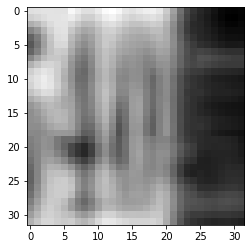

In [25]:
plt.imshow(X_test[1030].reshape(32,32),cmap='gray')
print("The predicted number in the image is : ",model.predict_classes(X_test)[1030])

- the above image seems to have 4 and 0 in it and our model predicted 0 so its a good outcome.

The predicted number in the image is :  5


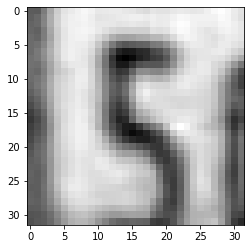

In [62]:
plt.imshow(X_test[11111].reshape(32,32),cmap='gray')
print("The predicted number in the image is : ",model.predict_classes(X_test)[11111])

- we can notice in this that the perdiction is accurate

The predicted number in the image is :  6


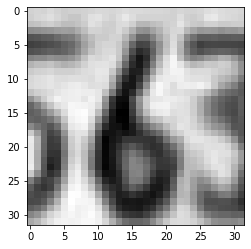

In [63]:
plt.imshow(X_test[96].reshape(32,32),cmap='gray')
print("The predicted number in the image is : ",model.predict_classes(X_test)[96])

- the above image seems to have 563 in it and our model is predicting number 6 which is in the middle